In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Training Dataframe Exploratory Analysis

In [17]:
## Here I am importing the training dataframe and printing out a few valuable
## characteristics to take note of
train_df = pd.read_csv('/Users/TerryONeill/west_nile/west_nile/assets/train.csv')
print 'size of dataframe:\n', train_df.shape
print
print 'datatypes:\n', train_df.dtypes
print
print 'null values:\n', train_df.isnull().sum()  ## no null values

size of dataframe:
(10506, 12)

datatypes:
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

null values:
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64


In [18]:
## Next we will take a look at the head to get familiar with the dataframe
train_df.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [56]:
## checking to see how many traps there were from unique values in that column
train_df.Trap.nunique()

## this tells us there are 136 traps total collecting mosquitoes

136

In [57]:
train_df.AddressAccuracy.value_counts()

8    4628
9    3980
5    1807
3      91
Name: AddressAccuracy, dtype: int64

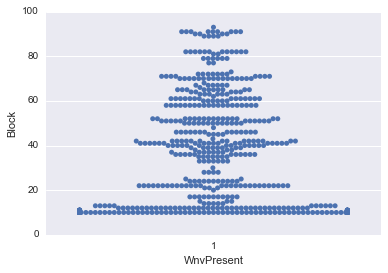

In [62]:
## the following is a plot of the frequency of occurence of a positive westnile virus
## mosquitoe ordered by block in the city

sns.swarmplot(train_df.WnvPresent[train_df['WnvPresent'] == 1], train_df.Block[train_df['WnvPresent'] == 1])

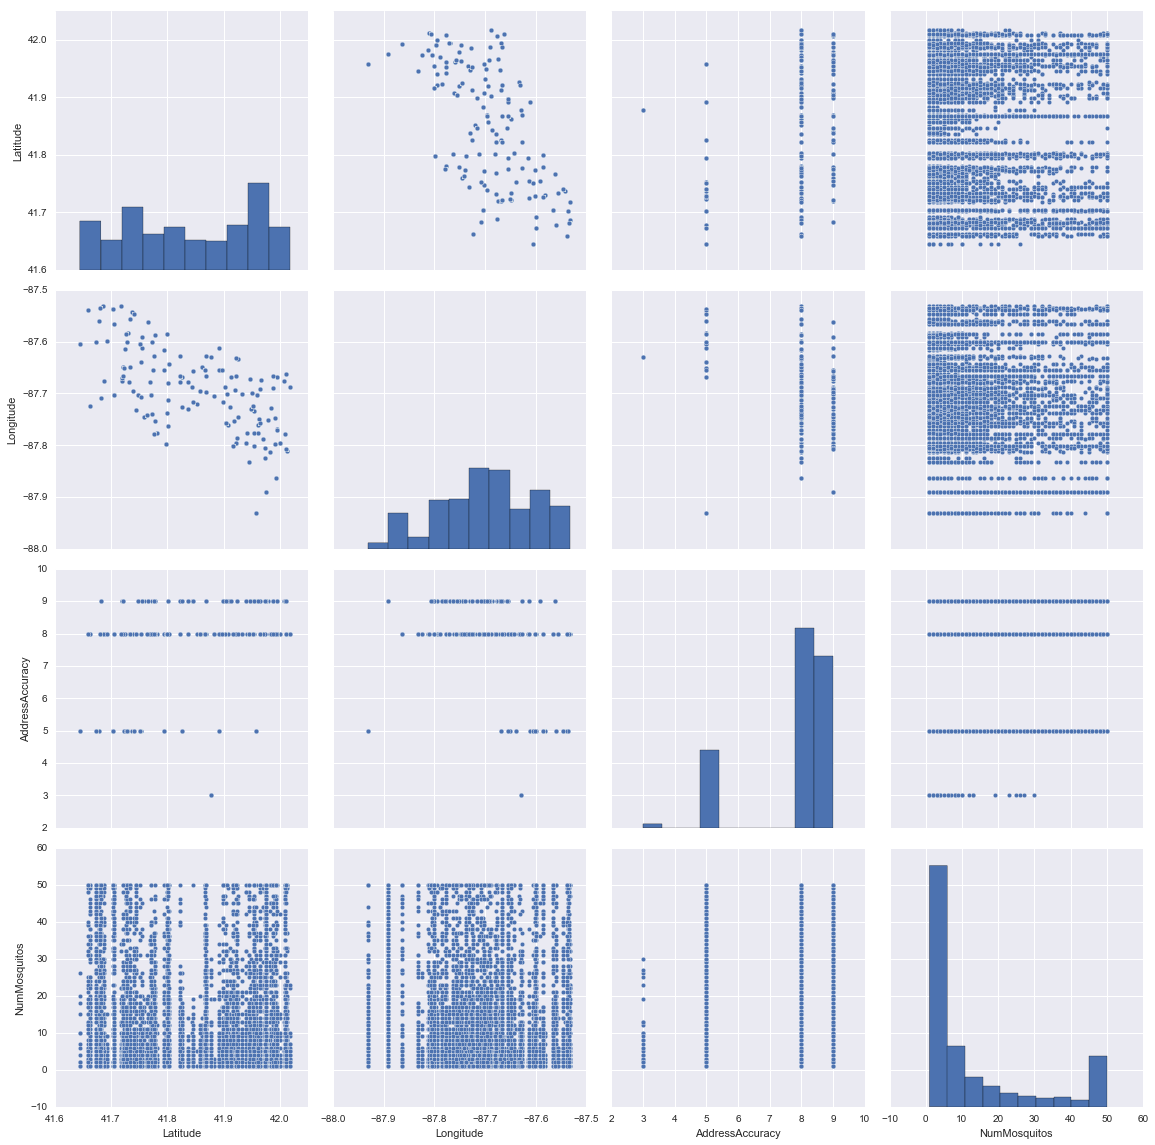

In [45]:
cols_plot = ['Latitude', 'Longitude', 'AddressAccuracy', 'NumMosquitos']

sns.pairplot(train_df[cols_plot], size = 4)

In [26]:
## I am creating the engine that connects psql with my newly created database (west_nile)
## so that i can export the dataframes as tables

from sqlalchemy import create_engine
import psycopg2

engine = create_engine('postgresql://TerryONeill@localhost:5432/west_nile')

In [63]:
## this is adding the dataframe to my newly created database in psql as
## a table named 'whatever the first parameter is'
train_df.to_sql('training_data', engine)